<a href="https://colab.research.google.com/github/Siddhi-Sovle/MoneyLaundering/blob/main/Actual_Money_Laundering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv(r"C:\Users\sidsr\OneDrive\Desktop\new_csv\HI-Small_Trans.csv")

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5078345 entries, 0 to 5078344
Data columns (total 11 columns):
 #   Column              Dtype  
---  ------              -----  
 0   Timestamp           object 
 1   From Bank           int64  
 2   Account             object 
 3   To Bank             int64  
 4   Account.1           object 
 5   Amount Received     float64
 6   Receiving Currency  object 
 7   Amount Paid         float64
 8   Payment Currency    object 
 9   Payment Format      object 
 10  Is Laundering       int64  
dtypes: float64(2), int64(3), object(6)
memory usage: 426.2+ MB


In [ ]:
pd.set_option('display.float_format', '{:.2f}'.format)
df.describe()

,From Bank,To Bank,Amount Received,Amount Paid,Is Laundering
count,5078345.00,5078345.00,5078345.00,5078345.00,5078345.00
mean,45730.57,65744.56,5988726.07,4509273.37,0.00
std,81765.62,84092.99,1037183108.89,869772830.92,0.03
min,1.00,1.00,0.00,0.00,0.00
25%,119.00,4259.00,183.37,184.48,0.00
50%,9679.00,21568.00,1411.01,1414.54,0.00
75%,28628.00,122332.00,12346.27,12297.84,0.00
max,356303.00,356294.00,1046302363293.48,1046302363293.48,1.00


In [ ]:
df.isna().sum()

Timestamp             0
From Bank             0
Account               0
To Bank               0
Account.1             0
Amount Received       0
Receiving Currency    0
Amount Paid           0
Payment Currency      0
Payment Format        0
Is Laundering         0
dtype: int64

In [ ]:
column_value_counts = {}
for column in df.columns:
    if df[column].dtype=='object':
        column_value_counts[column] = df[column].value_counts()

for column, value_counts in column_value_counts.items():
    print(f"Value counts for column '{column}':\n{value_counts}\n")
    print(" ")

Value counts for column 'Timestamp':
Timestamp
2022/09/01 00:04    11193
2022/09/01 00:26    11025
2022/09/01 00:17    11018
2022/09/01 00:14    11003
2022/09/01 00:29    10998
                    ...  
2022/09/12 15:41        1
2022/09/12 08:51        1
2022/09/11 00:24        1
2022/09/11 11:36        1
2022/09/11 18:15        1
Name: count, Length: 15018, dtype: int64

 
Value counts for column 'Account':
Account
100428660    168672
1004286A8    103018
100428978     20497
1004286F0     18663
100428780     17264
              ...  
806198930         1
806197550         1
80127BE50         1
8061935F0         1
8148A8671         1
Name: count, Length: 496995, dtype: int64

 
Value counts for column 'Account.1':
Account.1
100428660    1084
1004286A8     653
80F47A310     159
100428978     150
8018859B0     144
             ... 
80B14E9D0       1
80B159D00       1
812577710       1
812569750       1
80F91C540       1
Name: count, Length: 420636, dtype: int64

 
Value counts for column '

In [ ]:
df.columns

Index(['Timestamp', 'From Bank', 'Account', 'To Bank', 'Account.1',
       'Amount Received', 'Receiving Currency', 'Amount Paid',
       'Payment Currency', 'Payment Format', 'Is Laundering'],
      dtype='object')

# UNIVARIATE ANALYSIS


Counts of Laundering vs Legitimate Transactions:
Is Laundering
0    5073168
1       5177
Name: count, dtype: int64

Percentage Distribution:
Is Laundering
0   99.90
1    0.10
Name: count, dtype: float64


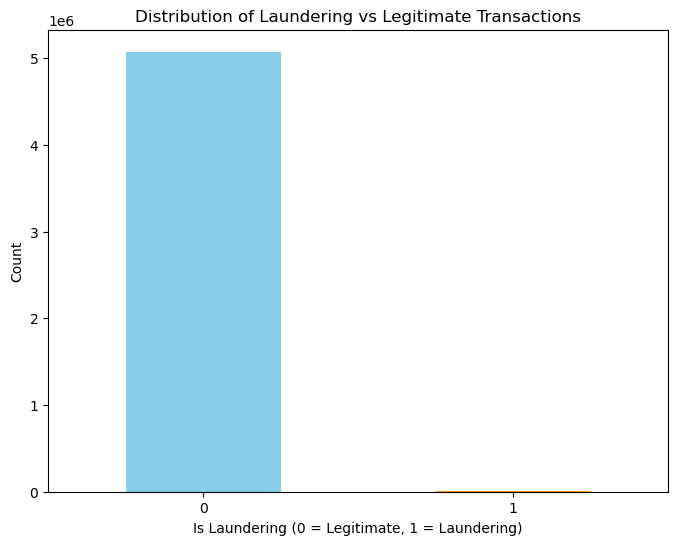

In [ ]:
laundering_counts = df['Is Laundering'].value_counts()
laundering_percentage = (laundering_counts / len(df)) * 100

print("Counts of Laundering vs Legitimate Transactions:")
print(laundering_counts)
print("\nPercentage Distribution:")
print(laundering_percentage)

# Plot the distribution
plt.figure(figsize=(8, 6))
laundering_counts.plot(kind='bar', color=['skyblue', 'orange'])
plt.title("Distribution of Laundering vs Legitimate Transactions")
plt.xlabel("Is Laundering (0 = Legitimate, 1 = Laundering)")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.show()

The Dataset is highly imbalanced, with the 'Is Laundering' column being extremely skewed. This is very common in datasets related to fraudulent activities, where actual fraudulent activities are rare. Resampling has to be done.

In [ ]:

laundering_transactions = df[df['Is Laundering'] == 1]
legitimate_transactions = df[df['Is Laundering'] == 0]

def calculate_stats(column, transaction_type):
    return {
        'Mean': column.mean(),
        'Median': column.median(),
        'Min': column.min(),
        'Max': column.max(),
        'Range': column.max() - column.min(),
        'Skewness': column.skew(),
    }

amount_received_stats_laundering = calculate_stats(laundering_transactions['Amount Received'], "Laundering")
amount_received_stats_legitimate = calculate_stats(legitimate_transactions['Amount Received'], "Legitimate")

amount_paid_stats_laundering = calculate_stats(laundering_transactions['Amount Paid'], "Laundering")
amount_paid_stats_legitimate = calculate_stats(legitimate_transactions['Amount Paid'], "Legitimate")

print("Amount Received (Laundering):", amount_received_stats_laundering)
print("Amount Received (Legitimate):", amount_received_stats_legitimate)

print("\nAmount Paid (Laundering):", amount_paid_stats_laundering)
print("Amount Paid (Legitimate):", amount_paid_stats_legitimate)


Amount Received (Laundering): {'Mean': 36135310.41281265, 'Median': 8667.21, 'Min': 0.003227, 'Max': 84853144179.58, 'Range': 84853144179.57678, 'Skewness': 49.44634089358389}
Amount Received (Legitimate): {'Mean': 5957962.478734538, 'Median': 1407.51, 'Min': 1e-06, 'Max': 1046302363293.48, 'Range': 1046302363293.48, 'Skewness': 651.0063488280698}

Amount Paid (Laundering): {'Mean': 36135310.41281265, 'Median': 8667.21, 'Min': 0.003227, 'Max': 84853144179.58, 'Range': 84853144179.57678, 'Skewness': 49.44634089358389}
Amount Paid (Legitimate): {'Mean': 4477000.043896748, 'Median': 1410.99, 'Min': 1e-06, 'Max': 1046302363293.48, 'Range': 1046302363293.48, 'Skewness': 862.1026523455029}


For both the columns, 'Amount Paid' and 'Amount Recieved' the mean>median , which explains the presence of some outliers on the extreme side of both the features; dragging some of the values to higher ranges. Also, the range between min and max values of both these columns are also huge, which tells that there is a lot of variation in the transactions happening.
We also find that there are many transactions in case of laundering, where the values of both the 'Amount Paid' and 'Amount Recieved' is same which tells that laundering transactions tend to involve transferring nearly equivalent amounts between accounts (e.g., layering money).

{'whiskers': [<matplotlib.lines.Line2D at 0x19880244350>,
 'caps': [<matplotlib.lines.Line2D at 0x19886833d50>,
 'boxes': [<matplotlib.lines.Line2D at 0x198b8300e50>],
 'medians': [<matplotlib.lines.Line2D at 0x19886844cd0>],
 'fliers': [<matplotlib.lines.Line2D at 0x198e539d510>],
 'means': []}

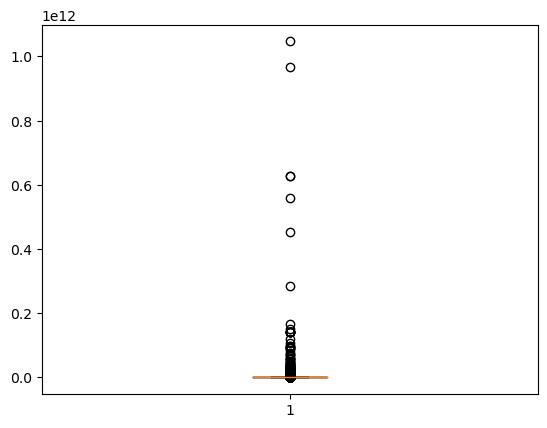

In [ ]:
plt.boxplot(df['Amount Paid'])

{'whiskers': [<matplotlib.lines.Line2D at 0x1988685bc10>,
 'caps': [<matplotlib.lines.Line2D at 0x198fd1e4f10>,
 'boxes': [<matplotlib.lines.Line2D at 0x1988685b250>],
 'medians': [<matplotlib.lines.Line2D at 0x198fd1e6110>],
 'fliers': [<matplotlib.lines.Line2D at 0x198fd1e4bd0>],
 'means': []}

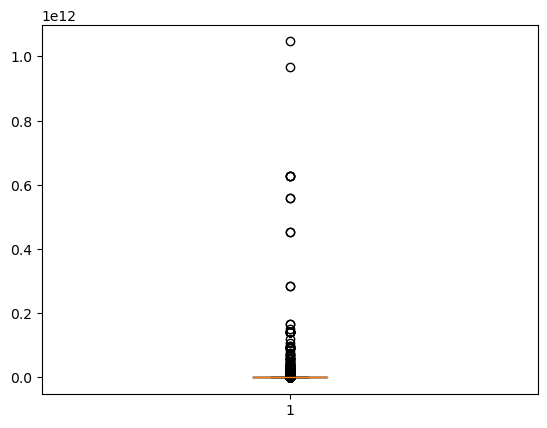

In [ ]:
plt.boxplot(df['Amount Received'])

There are alot of outliers present in both these columns but since the goal is to detect rare or extreme events,like laundering transactions, you must retain outliers as they might be key indicators of illicit behavior. Lundering Transactions might involve inheritently high amounts of unsual transactions. Removing the outliers might not be the correct way to deal with.

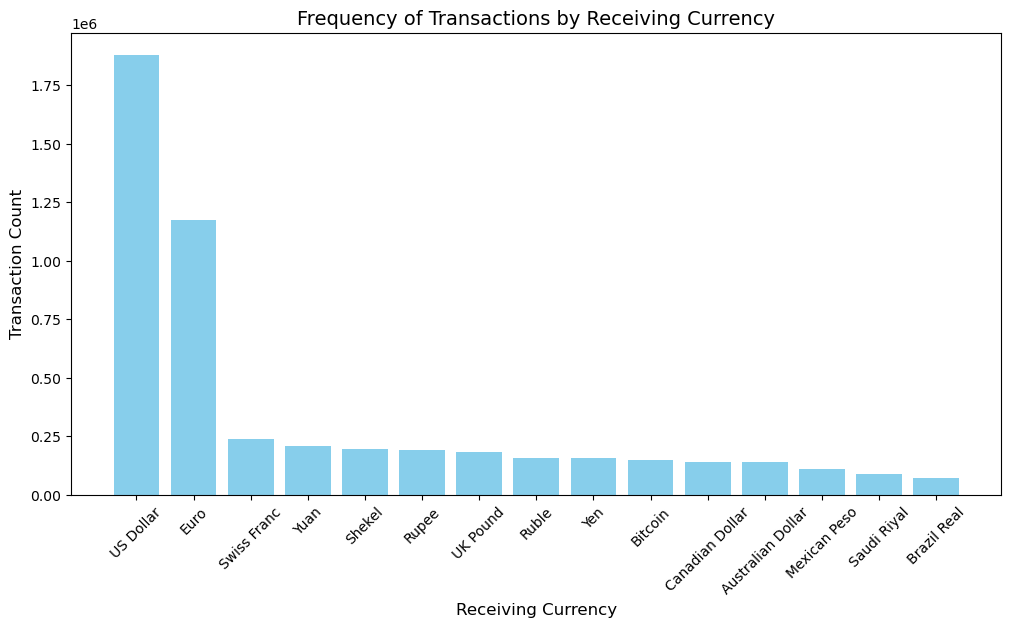

In [ ]:
import matplotlib.pyplot as plt


receiving_currency_counts = df['Receiving Currency'].value_counts()

payment_currency_counts = df['Payment Currency'].value_counts()

plt.figure(figsize=(12, 6))
plt.bar(receiving_currency_counts.index, receiving_currency_counts.values, color='skyblue')
plt.title('Frequency of Transactions by Receiving Currency', fontsize=14)
plt.xlabel('Receiving Currency', fontsize=12)
plt.ylabel('Transaction Count', fontsize=12)
plt.xticks(rotation=45)
plt.show()



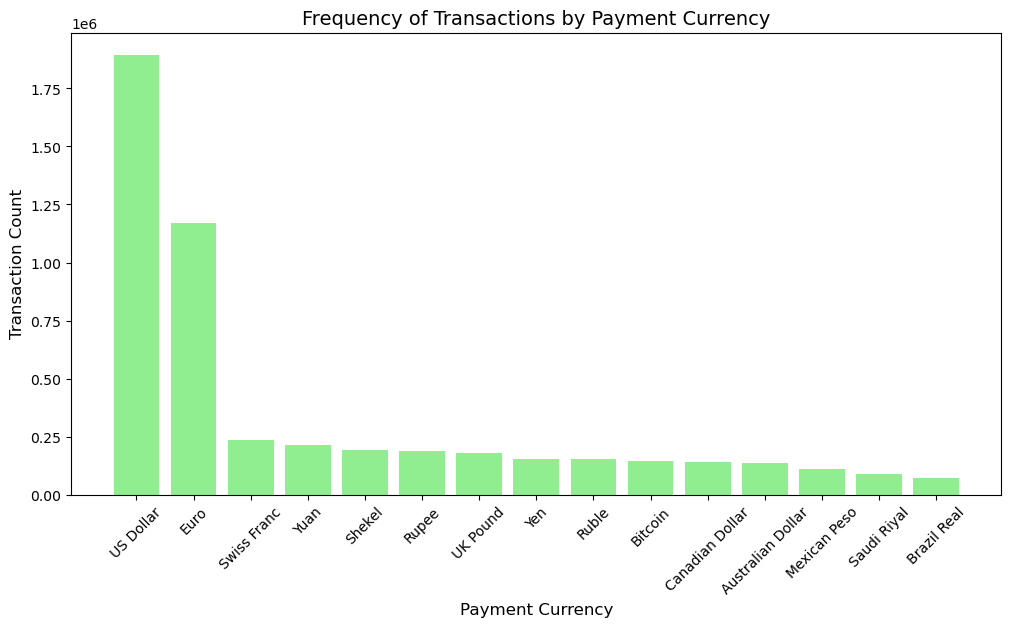

In [ ]:
plt.figure(figsize=(12, 6))
plt.bar(payment_currency_counts.index, payment_currency_counts.values, color='lightgreen')
plt.title('Frequency of Transactions by Payment Currency', fontsize=14)
plt.xlabel('Payment Currency', fontsize=12)
plt.ylabel('Transaction Count', fontsize=12)
plt.xticks(rotation=45)
plt.show()

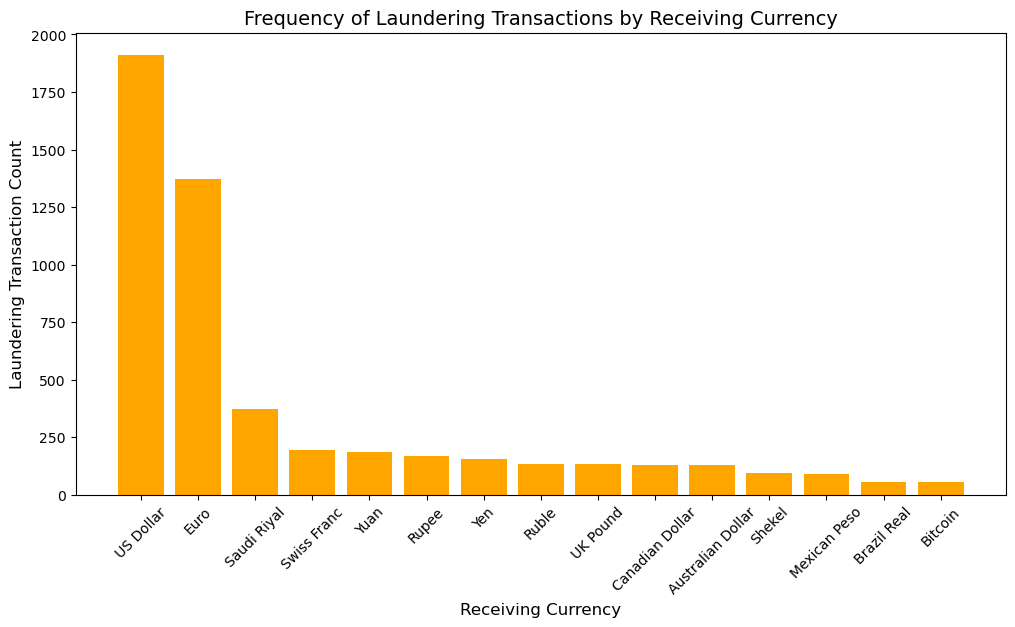

In [ ]:
laundering_receiving_currency = df[df['Is Laundering'] == 1]['Receiving Currency'].value_counts()

laundering_payment_currency = df[df['Is Laundering'] == 1]['Payment Currency'].value_counts()

plt.figure(figsize=(12, 6))
plt.bar(laundering_receiving_currency.index, laundering_receiving_currency.values, color='orange')
plt.title('Frequency of Laundering Transactions by Receiving Currency', fontsize=14)
plt.xlabel('Receiving Currency', fontsize=12)
plt.ylabel('Laundering Transaction Count', fontsize=12)
plt.xticks(rotation=45)
plt.show()

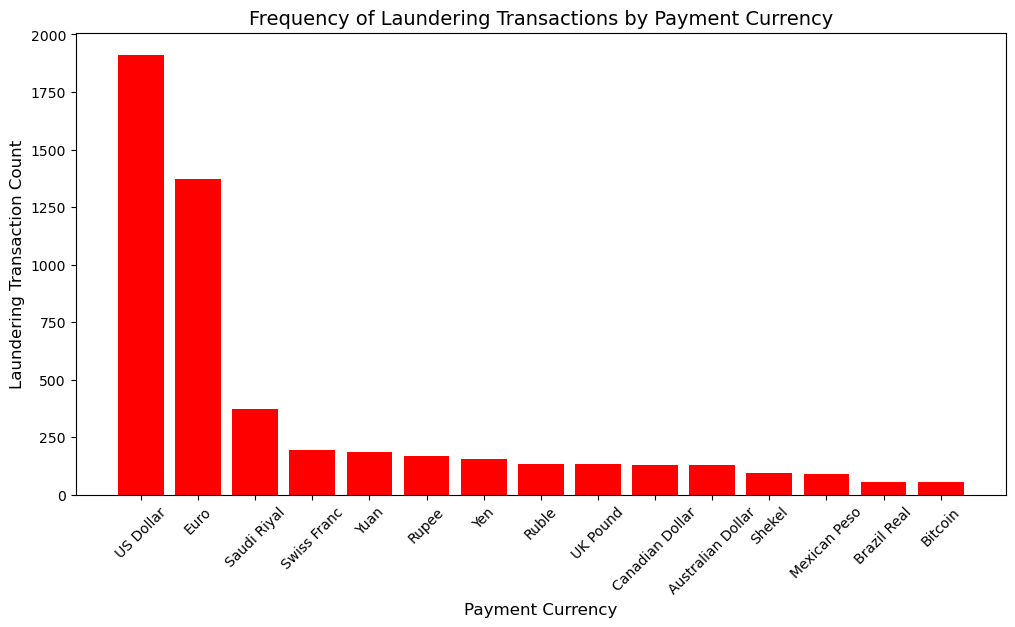

In [ ]:
plt.figure(figsize=(12, 6))
plt.bar(laundering_payment_currency.index, laundering_payment_currency.values, color='red')
plt.title('Frequency of Laundering Transactions by Payment Currency', fontsize=14)
plt.xlabel('Payment Currency', fontsize=12)
plt.ylabel('Laundering Transaction Count', fontsize=12)
plt.xticks(rotation=45)
plt.show()

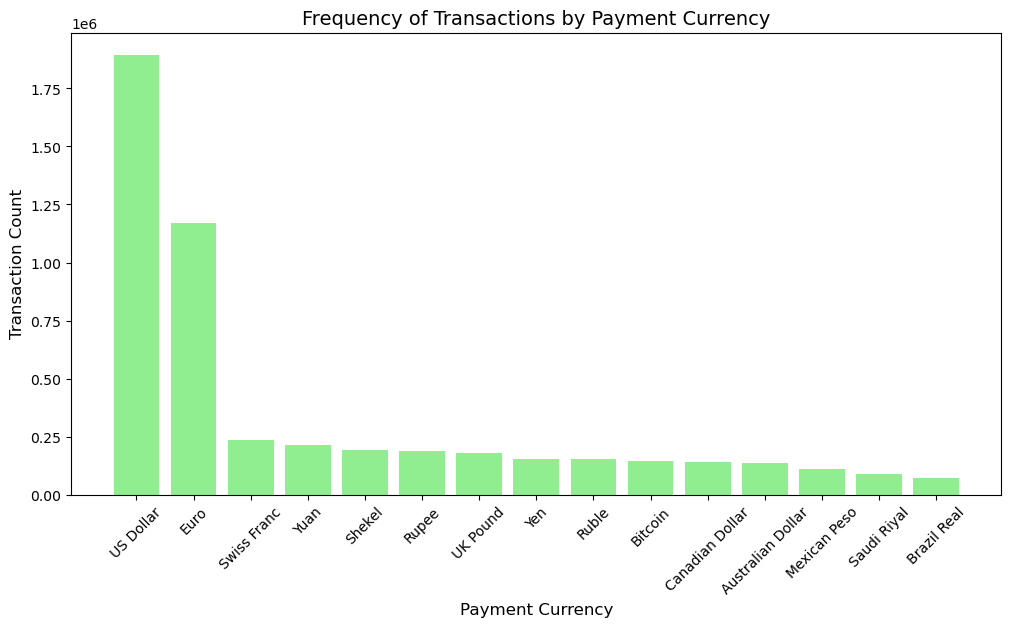

In [ ]:
plt.figure(figsize=(12, 6))
plt.bar(payment_currency_counts.index, payment_currency_counts.values, color='lightgreen')
plt.title('Frequency of Transactions by Payment Currency', fontsize=14)
plt.xlabel('Payment Currency', fontsize=12)
plt.ylabel('Transaction Count', fontsize=12)
plt.xticks(rotation=45)
plt.show()

1)The lists of currencies used for receiving and payment are nearly identical, which suggests no specific bias toward certain     currencies for sending or receiving funds.

2)Laundering transactions show a similar distribution across currencies, with US Dollar and Euro still leading. This suggests
  that even illicit transactions prefer these widely accepted currencies for easier integration into financial systems.
  
3)The frequency of laundering transactions in certain currencies (e.g., Saudi Riyal, Yuan, Swiss Franc) might indicate regions
  where laundering operations are more active, or jurisdictions with financial systems exploited for such activities.
  
4)The presence of Bitcoin in both legitimate and laundering transactions highlights its role as an alternative currency, often
  associated with anonymity in financial dealings.

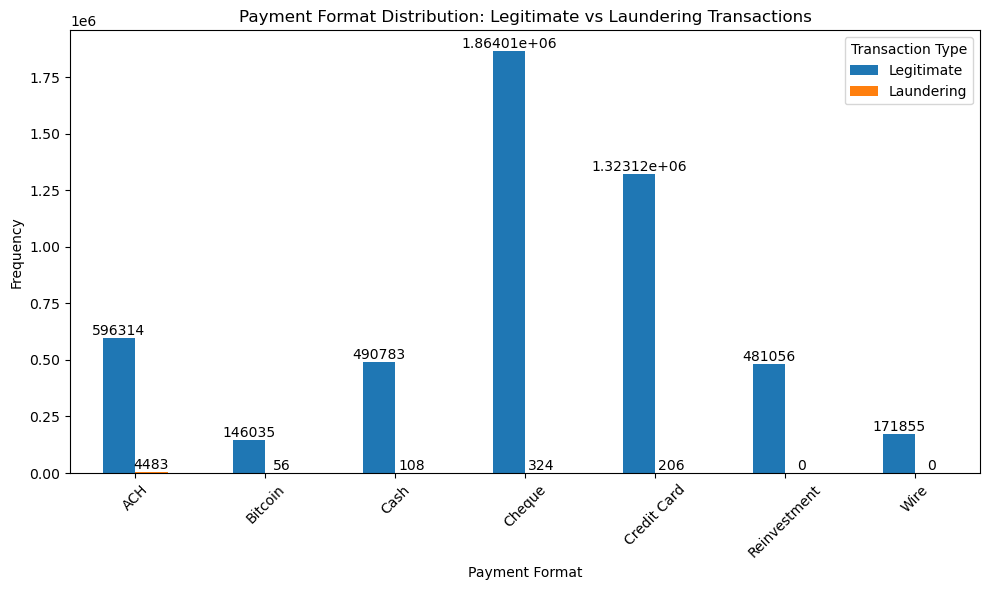

In [ ]:
import matplotlib.pyplot as plt

# Frequency of Payment Format for laundering vs legitimate
payment_format_legit = df[df['Is Laundering'] == 0]['Payment Format'].value_counts()
payment_format_laundering = df[df['Is Laundering'] == 1]['Payment Format'].value_counts()

# Combine data into a DataFrame for easier visualization
payment_format_data = pd.DataFrame({
    'Legitimate': payment_format_legit,
    'Laundering': payment_format_laundering
}).fillna(0)

# Bar Plot
ax = payment_format_data.plot(kind='bar', figsize=(10, 6))
plt.title('Payment Format Distribution: Legitimate vs Laundering Transactions')
plt.ylabel('Frequency')
plt.xlabel('Payment Format')
plt.xticks(rotation=45)
plt.legend(title='Transaction Type')

# Annotating the bars with values
for container in ax.containers:
    ax.bar_label(container, label_type='edge', fontsize=10)

plt.tight_layout()
plt.show()


In [ ]:
df.tail(5)

,Timestamp,From Bank,Account,To Bank,Account.1,Amount Received,Receiving Currency,Amount Paid,Payment Currency,Payment Format,Is Laundering
5078340,2022-09-18 10:02:00,9371,8043A0FB0,16163,802F78670,3749.14,US Dollar,3749.14,US Dollar,ACH,1
5078341,2022-09-18 11:18:00,9371,8043A0FB0,9371,8043A0FB0,1785.27,Euro,2091.95,US Dollar,ACH,0
5078342,2022-09-18 11:18:00,9371,8043A0FB0,13858,8095526B0,1785.27,Euro,1785.27,Euro,ACH,1
5078343,2022-09-18 12:58:00,9371,8043A0FB0,1124,8026687E0,2154.54,US Dollar,2154.54,US Dollar,ACH,1
5078344,2022-09-18 16:18:00,9371,8043A0FB0,4503,809320130,5448.55,US Dollar,5448.55,US Dollar,ACH,1


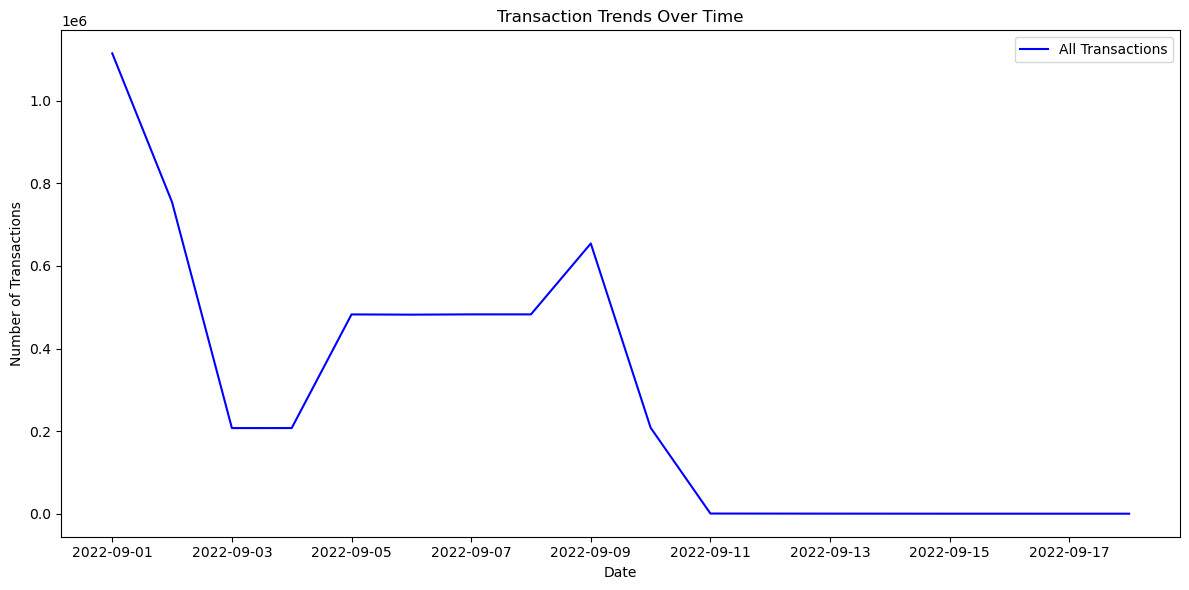

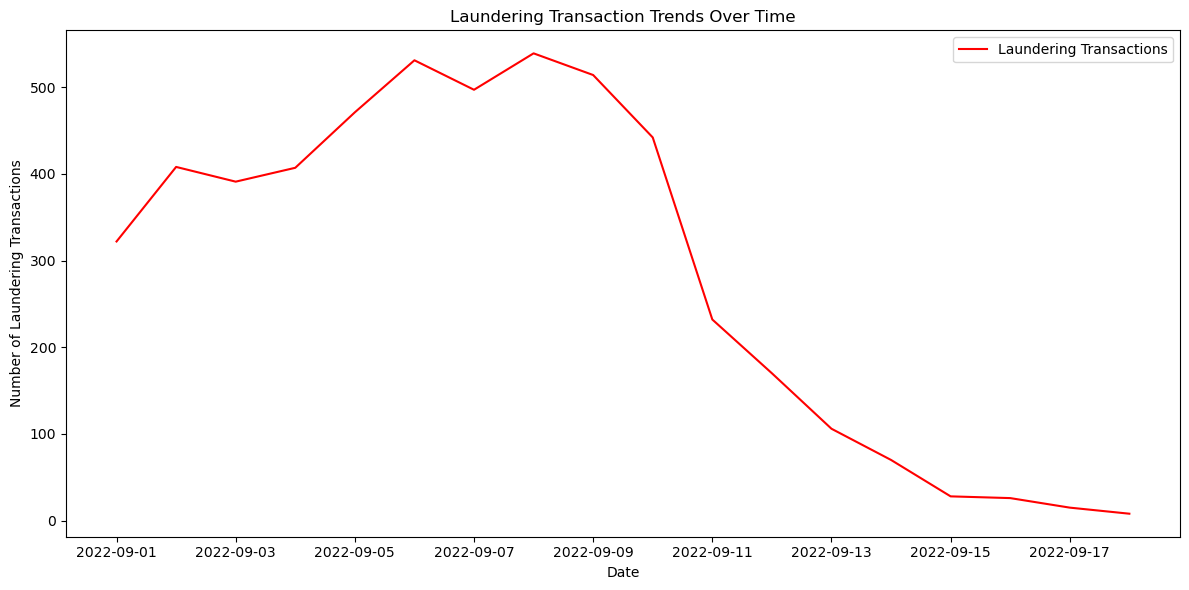

In [ ]:
# Convert Timestamp to datetime
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

df = df.sort_values(by='Timestamp')

# Reset the index after sorting (optional, but recommended for consistency)
df.reset_index(drop=True, inplace=True)

# Count of transactions per day
transactions_per_day = df.groupby(df['Timestamp'].dt.date).size()

# Line chart
plt.figure(figsize=(12, 6))
transactions_per_day.plot(kind='line', color='blue', label='All Transactions')
plt.title('Transaction Trends Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Transactions')
plt.legend()
plt.tight_layout()
plt.show()

# Peaks in laundering transactions
laundering_transactions_per_day = df[df['Is Laundering'] == 1].groupby(df['Timestamp'].dt.date).size()

plt.figure(figsize=(12, 6))
laundering_transactions_per_day.plot(kind='line', color='red', label='Laundering Transactions')
plt.title('Laundering Transaction Trends Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Laundering Transactions')
plt.legend()
plt.tight_layout()
plt.show()


### Transaction Trends Over Time:
1) Initial Decline (2022-09-01 to 2022-09-03): A drop in the overall transaction volume could indicate a slow period or low activity, possibly due to non-operational days (weekends, holidays) or fewer transactions in general. The straight line suggests minimal fluctuation in transaction volume during this period.
2) Subsequent Increase (2022-09-03 to 2022-09-05): A sudden rise in transactions could signify an event or specific action that caused a spike in transaction activity, such as an important business or financial event. This could be a period of increased buying, sales, or significant financial movement.
3) Stable Period (2022-09-05 to 2022-09-07): After the spike, the transaction trend remained steady, indicating a period of consistent activity. The stable value might suggest normal operations without major changes or disruptions.
4) Second Increase (2022-09-08 to 2022-09-09): A sharp increase in transactions from 0.4 to 0.65 could again signify another event or surge in activity, potentially related to financial or market factors. The increase is more abrupt compared to the earlier increase, which could point to significant financial events.
5) Sudden Drop (2022-09-09 to 2022-09-11): The sharp drop to 0 could be due to a significant disruption or holiday period where transactions were significantly reduced or halted. This may also signal a non-operational phase or unexpected pause in the activity.
6) Stability After Drop (2022-09-11 to 2022-09-17): The long straight line suggests consistent but low-volume transactions. This could indicate a period of low activity, with transactions stabilizing at lower levels after the drop.


### Laundering Transaction Trends Over Time
1) Early Increase (2022-09-01 to 2022-09-03): The initial increase in laundering transactions could indicate a slow buildup of illicit activity, potentially ramping up as more transactions are conducted to obscure illegal funds.
2) Steady Trend (2022-09-03 to 2022-09-04): A steady line suggests that laundering activities during this period were stable, possibly indicating a phase where illegal transactions were proceeding at a constant pace without major fluctuations.
3) Sudden Increase (2022-09-03 to 2022-09-05): This sharp increase might represent a concentrated effort to launder a significant amount of illicit funds, possibly due to a specific event or action taken by the criminals involved.
4) Drop to 450 (2022-09-05 to 2022-09-07): The decrease could reflect a period where laundering activities slowed down, possibly because of an investigation, awareness, or regulatory actions.
5) Second Surge (2022-09-09): A second increase in laundering activities could indicate that efforts to obscure illicit transactions were revived, with criminals attempting to hide funds in another round of activity.
6) Gradual Decline (2022-09-09 to 2022-09-17): The steady decrease in laundering transactions as we approach 2022-09-17 may reflect the aftermath of a period of heightened activity, possibly indicating reduced opportunity for laundering or that the illicit actors have moved to other strategies.

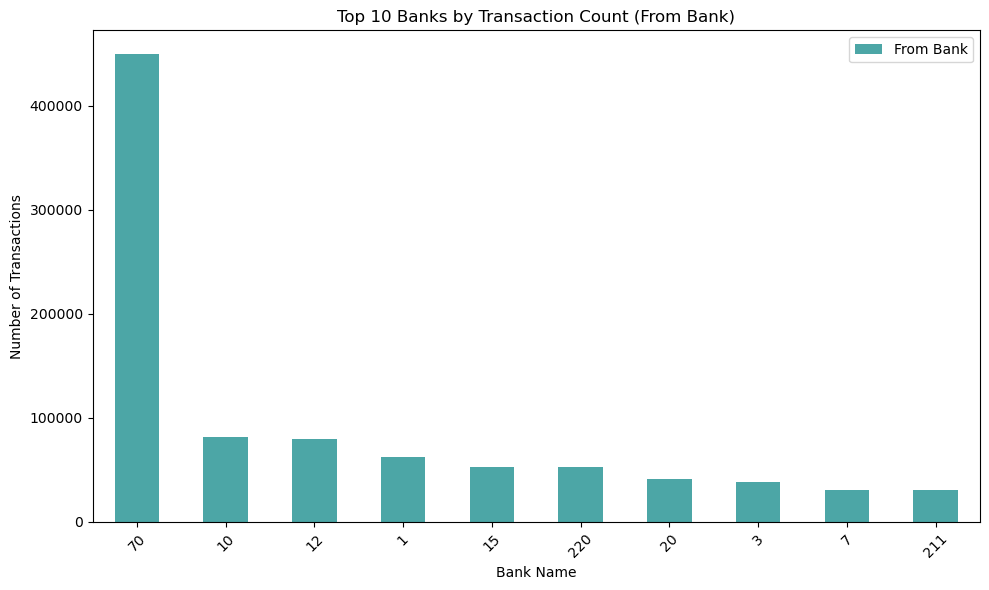

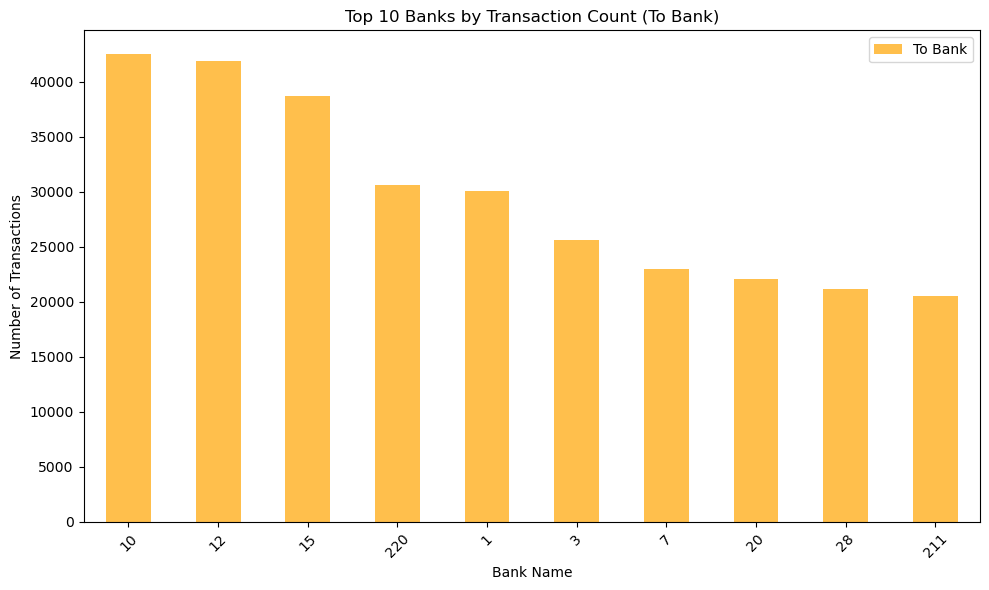

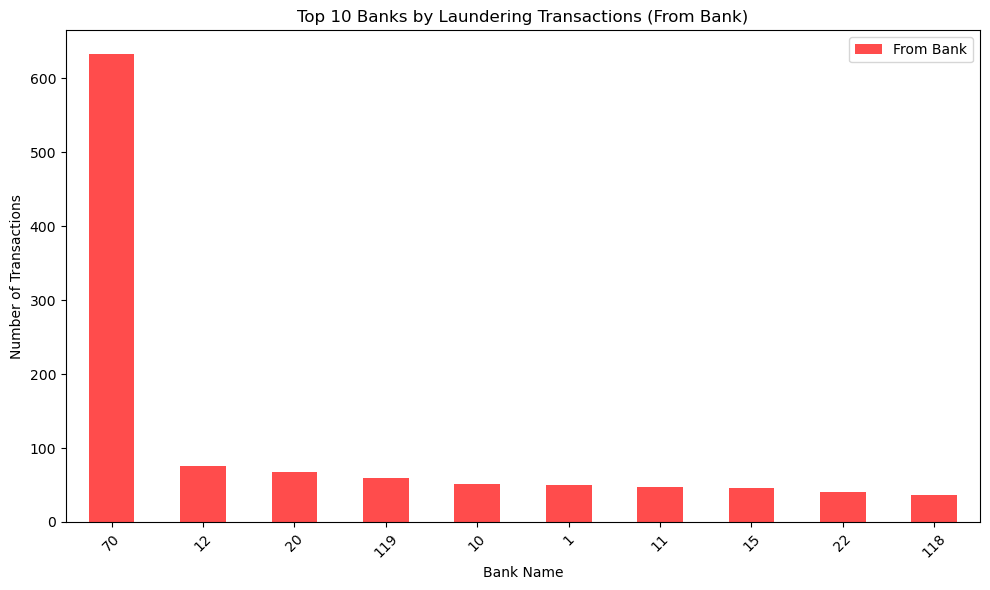

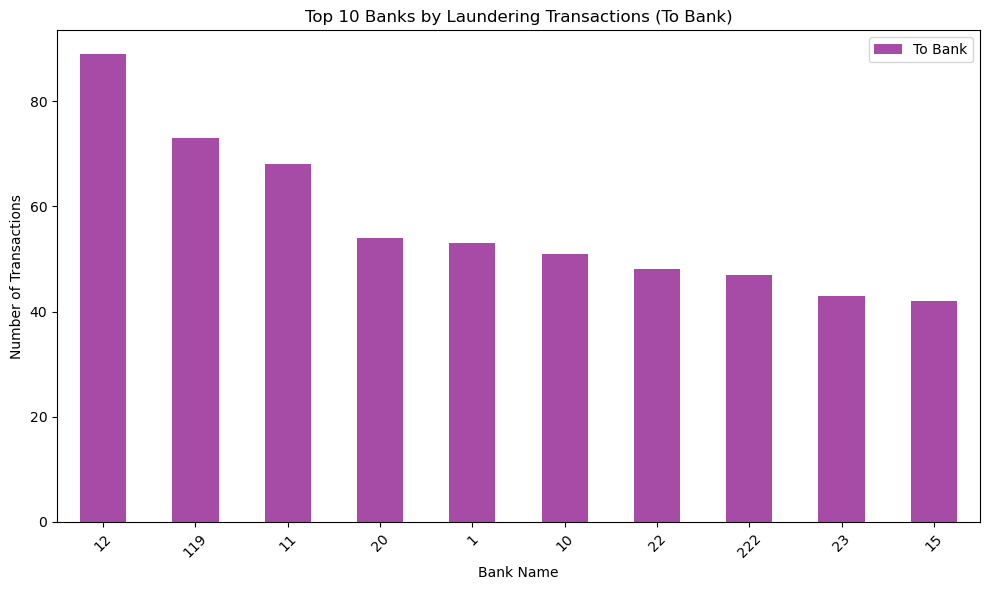

In [ ]:

from_bank_counts = df['From Bank'].value_counts().head(10)  # Top 20 banks
to_bank_counts = df['To Bank'].value_counts().head(10)      # Top 20 banks

# Bar plot for From Bank
plt.figure(figsize=(10, 6))
from_bank_counts.plot(kind='bar', color='teal', alpha=0.7, label='From Bank')
plt.title('Top 10 Banks by Transaction Count (From Bank)')
plt.ylabel('Number of Transactions')
plt.xlabel('Bank Name')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

# Bar plot for To Bank
plt.figure(figsize=(10, 6))
to_bank_counts.plot(kind='bar', color='orange', alpha=0.7, label='To Bank')
plt.title('Top 10 Banks by Transaction Count (To Bank)')
plt.ylabel('Number of Transactions')
plt.xlabel('Bank Name')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

# Banks involved in laundering transactions
from_bank_laundering = df[df['Is Laundering'] == 1]['From Bank'].value_counts().head(10)
to_bank_laundering = df[df['Is Laundering'] == 1]['To Bank'].value_counts().head(10)

# Bar plot for Laundering Transactions
plt.figure(figsize=(10, 6))
from_bank_laundering.plot(kind='bar', color='red', alpha=0.7, label='From Bank')
plt.title('Top 10 Banks by Laundering Transactions (From Bank)')
plt.ylabel('Number of Transactions')
plt.xlabel('Bank Name')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
to_bank_laundering.plot(kind='bar', color='purple', alpha=0.7, label='To Bank')
plt.title('Top 10 Banks by Laundering Transactions (To Bank)')
plt.ylabel('Number of Transactions')
plt.xlabel('Bank Name')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


# Relation between 'From Bank' and 'To Bank'
1) A few banks such as appear to dominate laundering activities, suggesting systemic issues at these institutions. These could include weaker Anti-Money Laundering controls or direct complicity.
2) The differences between "From Bank" and "To Bank" laundering patterns suggest that laundering strategies involve dispersing funds across multiple banks, complicating detection and tracing.
3) Bank 70 (highest laundering "From Bank") and bank 12 (highest laundering "To Bank") should be prioritized for audits or investigations.
4) The disparity in transaction volumes among the banks indicates that laundering activities are concentrated in specific institutions, while most banks operate with low transaction counts and minimal laundering involvement.

So let's further try to investigate these specific banks using a heatmap:


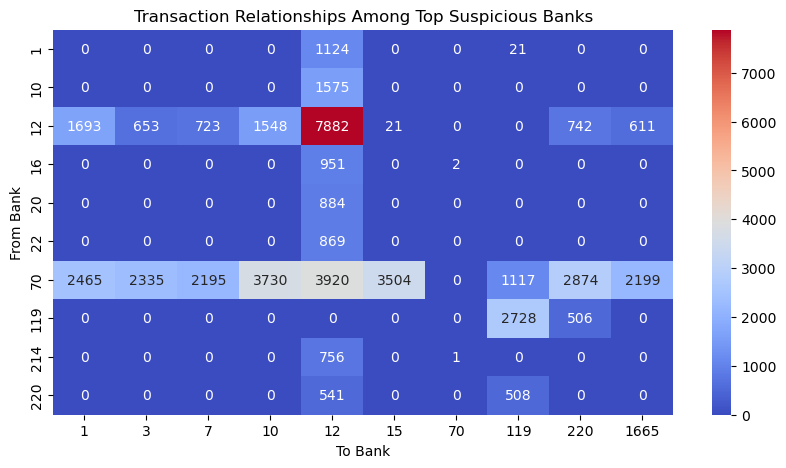

In [ ]:

top_from_banks = detailed_analysis.groupby('From Bank')['Transaction Count'].sum().nlargest(10).index
top_to_banks = detailed_analysis.groupby('To Bank')['Transaction Count'].sum().nlargest(10).index

filtered_data = detailed_analysis[
    (detailed_analysis['From Bank'].isin(top_from_banks)) &
    (detailed_analysis['To Bank'].isin(top_to_banks))
]

# Prepare data for heatmap
heatmap_data = filtered_data.pivot(index='From Bank', columns='To Bank', values='Transaction Count')

# Replace NaN with 0 for better visualization
heatmap_data = heatmap_data.fillna(0)

# Plot the heatmap
plt.figure(figsize=(10, 5))
sns.heatmap(
    data=heatmap_data,
    annot=True, fmt='.0f', cmap='coolwarm', cbar=True
)
plt.title('Transaction Relationships Among Top Suspicious Banks')
plt.xlabel('To Bank')
plt.ylabel('From Bank')
plt.show()


### Understanding the Heatmap
1) The consistent involvement of Bank 70 across different counterparties suggests it could be central in a network of suspicious transactions.
2) 'From Bank': 12, 'To Bank': 12 with 7882 transactions suggests a high volume of intra-bank transactions. This could imply internal fund movements or possibly obfuscation attempts.
3) Since Bank 70 is common for initiating the transactions for more than 1 bank, we can say that Bank 70 might act as a hub, funneling transactions to multiple other banks.

# BIVARIATE ANALYSIS

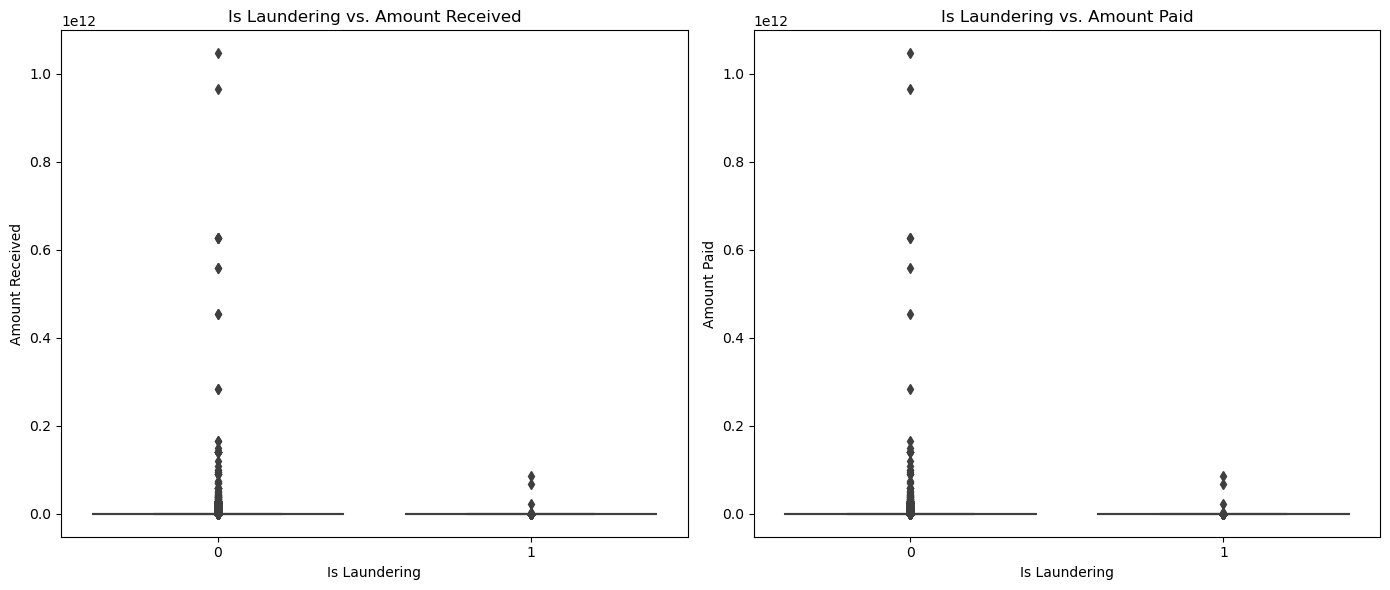

In [ ]:
# Is Laundering vs. Amount Received / Amount Paid
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
sns.boxplot(data=df, x='Is Laundering', y='Amount Received')
plt.title('Is Laundering vs. Amount Received')
plt.subplot(1, 2, 2)
sns.boxplot(data=df, x='Is Laundering', y='Amount Paid')
plt.title('Is Laundering vs. Amount Paid')
plt.tight_layout()
plt.show()

### Is Laundering vs. Amount Received / Amount Paid
1) For 'Not Laundering' Transactions, Most of the transaction amounts are concentrated in the range of 0 to 0.2. This suggests
   that legitimate transactions are predominantly small in terms of value.
2) For 'Laundering' Transactions, Similarly, the majority of transaction amounts are also concentrated in the range of 0 to 0.2.
   This implies that even laundering transactions tend to mimic smaller, less conspicuous amounts to avoid detection.


### Grouped Bar Chart for Is Laundering vs Receiving Currency / Payment Currency

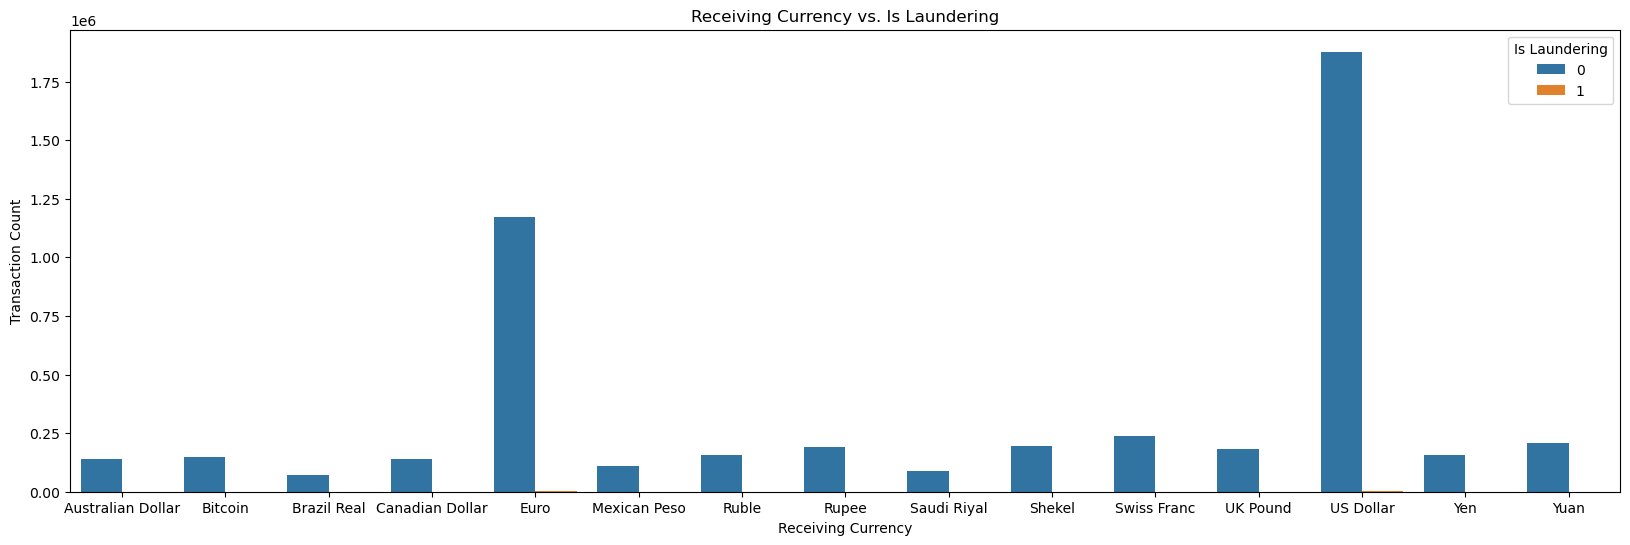

In [ ]:

currency_data = df.groupby(['Is Laundering', 'Receiving Currency']).size().reset_index(name='Transaction Count')
plt.figure(figsize=(20, 6))
sns.barplot(data=currency_data, x='Receiving Currency', y='Transaction Count', hue='Is Laundering')
plt.title('Receiving Currency vs. Is Laundering')
plt.show()

### Grouped Bar Chart for Is Laundering vs Payment Format

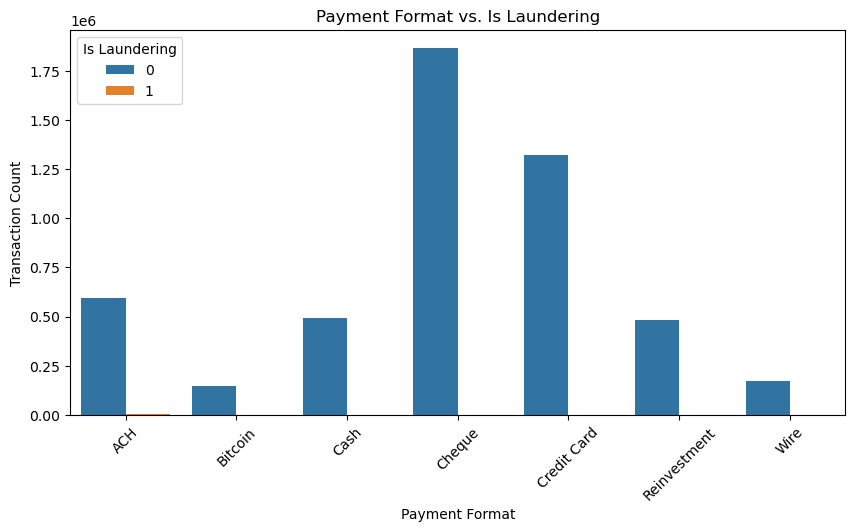

In [ ]:

payment_format_data = df.groupby(['Is Laundering', 'Payment Format']).size().reset_index(name='Transaction Count')
plt.figure(figsize=(10, 5))
sns.barplot(data=payment_format_data, x='Payment Format', y='Transaction Count', hue='Is Laundering')
plt.title('Payment Format vs. Is Laundering')
plt.xticks(rotation=45)
plt.show()

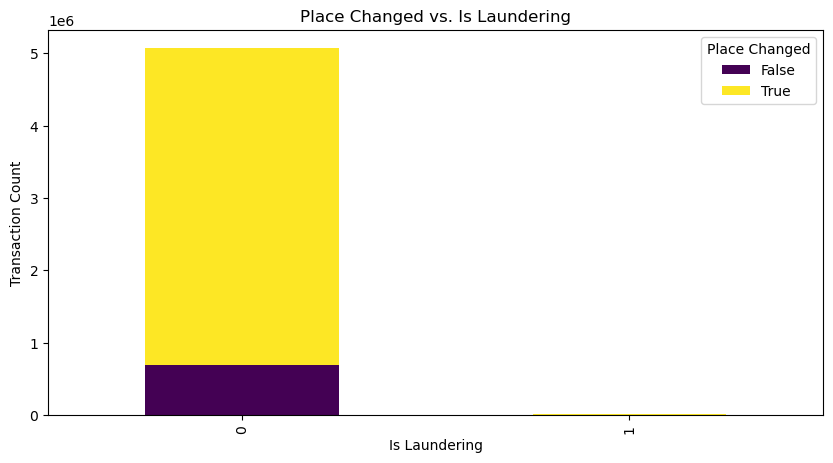

In [ ]:

df['Place Changed'] = df['From Bank'] != df['To Bank']
place_changed_data = df.groupby(['Is Laundering', 'Place Changed']).size().unstack(fill_value=0)
place_changed_data.plot(kind='bar', stacked=True, figsize=(10, 5), colormap='viridis')
plt.title('Place Changed vs. Is Laundering')
plt.xlabel('Is Laundering')
plt.ylabel('Transaction Count')
plt.show()

### Stacked Bar Chart for Place Changed vs. Is Laundering
1) For 'Not Laundering' Transactions, The majority of transactions involve a change in place (Place Changed = True), meaning that most legitimate transactions occur between different banks (From Bank ≠ To Bank)
2) For 'Laundering' Transactions, Within this subset, the majority still involve a change in place (Place Changed = True), suggesting that laundering activities also commonly involve transferring funds across different banks, potentially as part of the strategy to obscure the origin or destination of funds.
3) The dominance of Place Changed = True in both laundering and legitimate transactions highlights the importance of monitoring inter-bank transactions for anomalies.


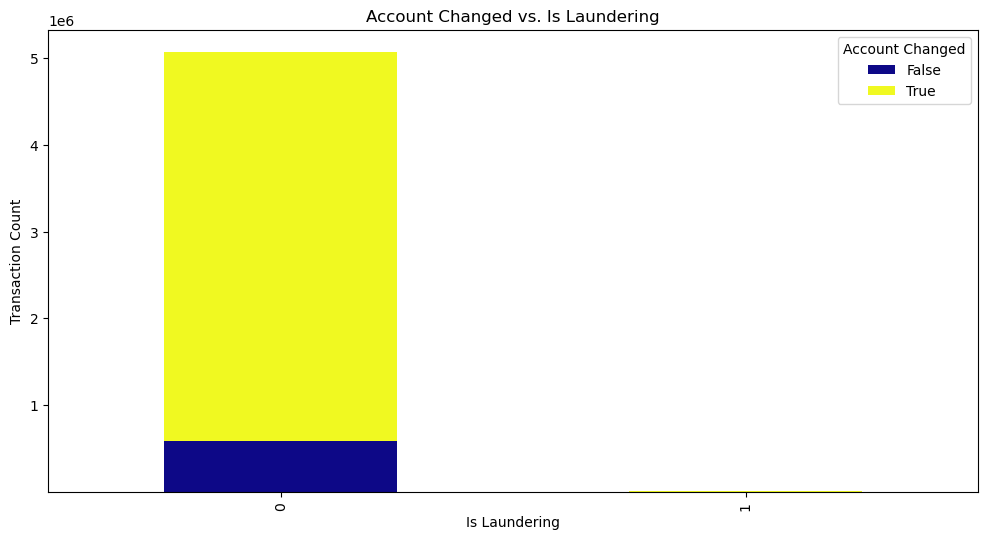

In [ ]:
# Stacked Bar Chart for Account Changed vs. Is Laundering
df['Account Changed'] = df['Account'] != df['Account.1']
account_changed_data = df.groupby(['Is Laundering', 'Account Changed']).size().unstack(fill_value=0)
account_changed_data.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='plasma')
plt.title('Account Changed vs. Is Laundering')
plt.xlabel('Is Laundering')
plt.ylabel('Transaction Count')
plt.show()

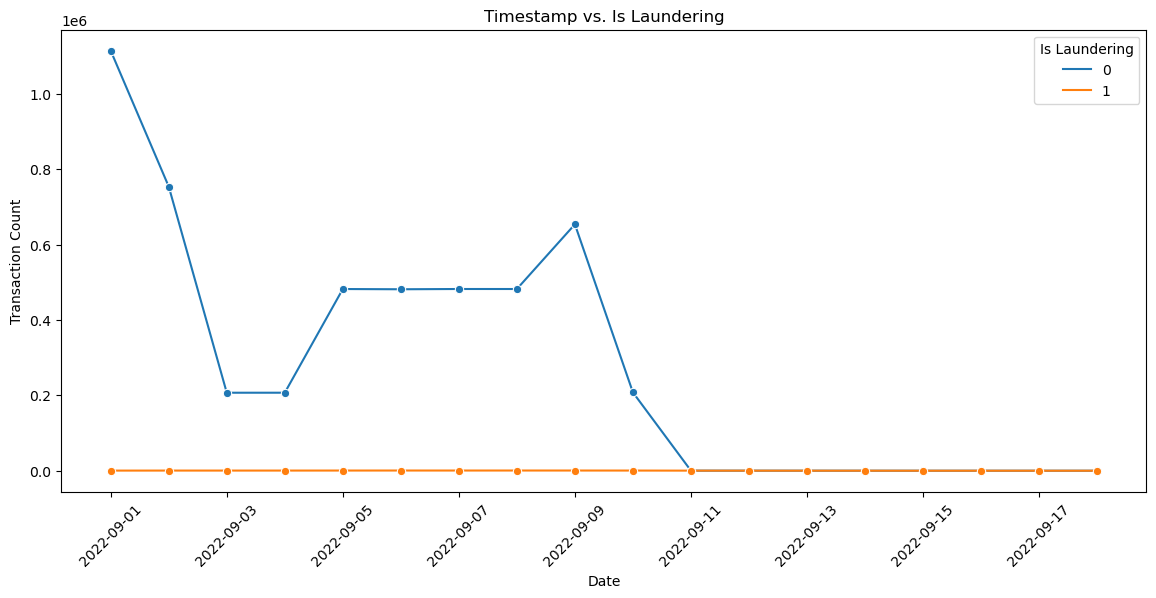

In [ ]:
# Time-Series Plot for Timestamp vs. Is Laundering
df['Timestamp'] = pd.to_datetime(df['Timestamp'])
time_series_data = df.groupby([df['Timestamp'].dt.date, 'Is Laundering']).size().reset_index(name='Transaction Count')
plt.figure(figsize=(14, 6))
sns.lineplot(data=time_series_data, x='Timestamp', y='Transaction Count', hue='Is Laundering', marker='o')
plt.title('Timestamp vs. Is Laundering')
plt.xlabel('Date')
plt.ylabel('Transaction Count')
plt.xticks(rotation=45)
plt.show()

In [ ]:
df.tail()

,Timestamp,From Bank,Account,To Bank,Account.1,Amount Received,Receiving Currency,Amount Paid,Payment Currency,Payment Format,Is Laundering
5078340,2022-09-18 10:02:00,9371,8043A0FB0,16163,802F78670,3749.14,US Dollar,3749.14,US Dollar,ACH,1
5078341,2022-09-18 11:18:00,9371,8043A0FB0,9371,8043A0FB0,1785.27,Euro,2091.95,US Dollar,ACH,0
5078342,2022-09-18 11:18:00,9371,8043A0FB0,13858,8095526B0,1785.27,Euro,1785.27,Euro,ACH,1
5078343,2022-09-18 12:58:00,9371,8043A0FB0,1124,8026687E0,2154.54,US Dollar,2154.54,US Dollar,ACH,1
5078344,2022-09-18 16:18:00,9371,8043A0FB0,4503,809320130,5448.55,US Dollar,5448.55,US Dollar,ACH,1


1)Cheque along with ACH are the most commonly used Payment formats indicating that relatively high number of laundering
  transactions could be a potential channel for money laundering, making it an important target for further scrutiny in anti-
  money laundering (AML) efforts.
  
2)Bitcoin, Cash, and Credit Card might involve minimum to moderate money laundering activities happening.

3)Reinvestment and Wire are the safest Payment Formats through which there are no money laundering activities going on.

In [ ]:
df[df['Is Laundering']==0]['Payment Format'].value_counts()

Payment Format
Cheque          1864007
Credit Card     1323118
ACH              596314
Cash             490783
Reinvestment     481056
Wire             171855
Bitcoin          146035
Name: count, dtype: int64

In [ ]:
def change(col, zero, one):

    for i in range(col.shape[0]):
        if col.values[i]==zero:
            col.values[i]=0
        elif col.values[i]==one:
            col.values[i]=1
        else:
            col.values[i]=2
    return col

Larger records (more columns or high cardinality features) consume more memory. If your dataset has many features, a smaller chunk size may be better.


In [ ]:
dfs = []

In [ ]:
import numpy as np
count = 0

for df in pd.read_csv(r"C:\Users\sidsr\OneDrive\Desktop\new_csv\HI-Small_Trans.csv", chunksize=1000000):
    df = df[df['Is Laundering'] == 1]
    del df['Timestamp']
    place_changed = []
    account_changed = []

    for i in range(df.shape[0]):
        if df['From Bank'].values[i] == df['To Bank'].values[i]:
            place_changed.append(0)
        else:
            place_changed.append(1)

        if df['Account'].values[i] == df['Account.1'].values[i]:
            account_changed.append(0)
        else:
            account_changed.append(1)

    place_changed = np.array(place_changed)
    account_changed = np.array(account_changed)
    del df['From Bank']
    del df['To Bank']
    del df['Account']
    del df['Account.1']

    df['Place Changed'] = place_changed
    df['Account Changed'] = account_changed
    df['Receiving Currency'] = change(df['Receiving Currency'], 'US Dollar', 'Euro')
    df['Payment Currency'] = change(df['Payment Currency'], 'US Dollar', 'Euro')
    df['Payment Format'] = change(df['Payment Format'], 'Cheque', 'Credit Card')

    dfs.append(df)

    print('part {} done'.format(str(count)))
    count += 1

part 0 done
part 1 done
part 2 done
part 3 done
part 4 done
part 5 done


In [ ]:
df_0 = pd.concat(dfs)
del dfs #Deletes the list of processed chunks to free up memory.
limit = df_0.shape[0]
print(limit)
dfs = []

5177


In [ ]:
count = 0
current = 0

for df in pd.read_csv(r"C:\Users\sidsr\OneDrive\Desktop\new_csv\HI-Small_Trans.csv", chunksize=100000):
    df = df[df['Is Laundering'] == 0]
    current += df.shape[0]

    del df['Timestamp']

    place_changed = []
    account_changed = []

    for i in range(df.shape[0]):
        if df['From Bank'].values[i] == df['To Bank'].values[i]:
            place_changed.append(0)
        else:
            place_changed.append(1)

        if df['Account'].values[i] == df['Account.1'].values[i]:
            account_changed.append(0)
        else:
            account_changed.append(1)

    place_changed = np.array(place_changed)
    account_changed = np.array(account_changed)

    del df['From Bank']
    del df['To Bank']
    del df['Account']
    del df['Account.1']

    df['Place Changed'] = place_changed
    df['Account Changed'] = account_changed
    df['Receiving Currency'] = change(df['Receiving Currency'], 'US Dollar', 'Euro')
    df['Payment Currency'] = change(df['Payment Currency'], 'US Dollar', 'Euro')
    df['Payment Format'] = change(df['Payment Format'], 'Cheque', 'Credit Card')

    dfs.append(df)

    print('part {} done'.format(str(count)))
    count += 1

    if current >= limit:
        break



part 0 done


In [ ]:
dfs.append(df_0)
df = pd.concat(dfs)
del df_0, dfs

In [ ]:
df[df['Is Laundering']==1]

,Amount Received,Receiving Currency,Amount Paid,Payment Currency,Payment Format,Is Laundering,Place Changed,Account Changed
4742,389769.39,0,389769.39,0,0,1,1,1
40621,29024.33,0,29024.33,0,1,1,1,1
69152,792.92,0,792.92,0,1,1,1,1
85763,13171425.53,0,13171425.53,0,0,1,1,1
90684,14288.83,0,14288.83,0,2,1,1,1
...,...,...,...,...,...,...,...,...
5071168,7773.42,0,7773.42,0,2,1,1,1
5073375,448920.65,2,448920.65,2,0,1,1,1
5074248,20085.71,2,20085.71,2,2,1,1,1
5075056,3314.36,0,3314.36,0,2,1,1,1


In [ ]:
from wolta.data_tools import unique_amounts

unique_amounts(df)

{'Amount Received': 74329,
 'Receiving Currency': 3,
 'Amount Paid': 74576,
 'Payment Currency': 3,
 'Payment Format': 3,
 'Is Laundering': 2,
 'Place Changed': 2,
 'Account Changed': 2}

In [ ]:
#You stopped here

In [ ]:
from wolta.data_tools import col_types

types = col_types(df, print_columns=True)

Amount Received: float64
Receiving Currency: int
Amount Paid: float64
Payment Currency: int
Payment Format: int
Is Laundering: int64
Place Changed: int32
Account Changed: int32


In [ ]:
from wolta.data_tools import unique_amounts

unique_amounts(df)

{'Amount Received': 74329,
 'Receiving Currency': 3,
 'Amount Paid': 74576,
 'Payment Currency': 3,
 'Payment Format': 3,
 'Is Laundering': 2,
 'Place Changed': 2,
 'Account Changed': 2}

In [ ]:
from wolta.data_tools import stat_sum

stat_sum(df,
        ['all'])

Amount Received
min: 1e-06
max: 1046302363293.48
width: 1046302363293.48
mean: 5988726.070072798
std: 1037183006.7737633
median: 1411.01
variance: 1.0757485895402644e+18
***
Receiving Currency
min: 0
max: 2
width: 2
mean: 1.0290736450556235
std: 0.8765657577643778
median: 1.0
variance: 0.768367527685038
***
Amount Paid
min: 1e-06
max: 1046302363293.48
width: 1046302363293.48
mean: 4509273.3677414
std: 869772745.2843992
median: 1414.54
variance: 7.565046284395603e+17
***
Payment Currency
min: 0
max: 2
width: 2
mean: 1.0235714588118767
std: 0.8771486265358619
median: 1.0
variance: 0.7693897130337489
***
Payment Format
min: 0
max: 2
width: 2
mean: 1.005190470517462
std: 0.8598786625477534
median: 1.0
variance: 0.739391314304913
***
Is Laundering
min: 0
max: 1
width: 1
mean: 0.0010194266045335635
std: 0.03191218221826161
median: 0.0
variance: 0.0010183873739315322
***
Place Changed
min: 0
max: 1
width: 1
mean: 0.8638666730992085
std: 0.3429300864720293
median: 1.0
variance: 0.1176010442077

In [ ]:
y = df['Is Laundering'].values
del df['Is Laundering']
X = df.values
del df

In [ ]:
from imblearn.under_sampling import RandomUnderSampler
undersampler = RandomUnderSampler()
X,y=undersampler.fit_resample(X,y)

C:\Users\sidsr\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\sidsr\anaconda3\Lib\site-packages\sklearn\base.py:484: FutureWarning: `BaseEstimator._check_n_features` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_n_features` instead.
  warnings.warn(
C:\Users\sidsr\anaconda3\Lib\site-packages\sklearn\base.py:493: FutureWarning: `BaseEstimator._check_feature_names` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_feature_names` instead.
  warnings.warn(


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
del X, y

In [ ]:
import lightgbm as lgb
model = lgb.LGBMClassifier(max_depth=5, num_leaves=3)
model.fit(X_train, y_train)

[LightGBM] [Info] Number of positive: 4164, number of negative: 4119
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000883 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 523
[LightGBM] [Info] Number of data points in the train set: 8283, number of used features: 7
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.502716 -> initscore=0.010866
[LightGBM] [Info] Start training from score 0.010866


C:\Users\sidsr\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\sidsr\anaconda3\Lib\site-packages\sklearn\utils\_tags.py:354: FutureWarning: The LGBMClassifier or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


LGBMClassifier(max_depth=5, num_leaves=3)

In [ ]:
model.score(X_train, y_train)

C:\Users\sidsr\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


0.9500181093806592

In [ ]:
model.score(X_test, y_test)

C:\Users\sidsr\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


0.9459198454852729

In [ ]:
y_pred=model.predict(X_test)

C:\Users\sidsr\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.94      0.95      1058
           1       0.94      0.95      0.95      1013

    accuracy                           0.95      2071
   macro avg       0.95      0.95      0.95      2071
weighted avg       0.95      0.95      0.95      2071



In [ ]:
y_pred_probs = model.predict_proba(X_test)[:, 1]

C:\Users\sidsr\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


In [ ]:
X_test = pd.DataFrame(X_test)

In [ ]:
X_test['Predicted Probability'] = y_pred_probs

In [ ]:
X_test.head()

,0,1,2,3,4,5,6,Predicted Probability
0,365.89,2,365.89,2,1,1,1,0.99
1,21270.90,2,21270.90,2,0,1,1,0.98
2,1093.03,0,1093.03,0,1,1,1,0.30
3,18.32,0,18.32,0,2,0,0,0.00
4,15.86,0,15.86,0,2,0,0,0.00


In [ ]:
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score

# Get the predicted labels from probabilities
y_pred = (y_pred_probs > 0.5).astype(int)

# Accuracy score
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

Accuracy: 0.9473684210526315


In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.94      0.95      1058
           1       0.94      0.95      0.95      1013

    accuracy                           0.95      2071
   macro avg       0.95      0.95      0.95      2071
weighted avg       0.95      0.95      0.95      2071



In [ ]:
roc_auc = roc_auc_score(y_test, y_pred_probs)
print(f'ROC AUC Score: {roc_auc}')

ROC AUC Score: 0.9877024018571426


In [ ]:
X_test['True Label'] = y_test

In [ ]:
import numpy as np
from scipy.optimize import minimize

# Define the budget (you can set this to any value based on the resources available)
budget = 1000  # Example budget value, adjust according to your scenario

# Sample data (assuming X_test['Predicted Probability'] exists)
# X_test['Predicted Probability'] = your_model_predictions

# Example of decision variable: intervention effort for each transaction
# You can set your intervention function based on predicted probability

def objective(x):
    # Minimize risk (probability of laundering) adjusted by intervention
    # This will penalize high probabilities of laundering unless we intervene
    return np.sum(X_test['Predicted Probability'] * (1 - x))  # Example: adjust the risk based on effort

# Define constraints
def budget_constraint(x):
    # The total sum of intervention efforts should not exceed the budget
    return budget - np.sum(x)  # Ensure total effort doesn't exceed the budget

def max_effort_constraint(x):
    # Each transaction's intervention effort should be between 0 and 1
    return 1 - np.max(x)  # If max(x) <= 1, this will return a non-negative value (satisfied constraint)

# Bounds for decision variables (0 <= x_i <= 1)
bounds = [(0, 1) for _ in range(len(X_test))]

# Constraints dictionary (budget and max effort constraints)
constraints = [
    {'type': 'ineq', 'fun': budget_constraint},  # Budget constraint (effort <= budget)
    {'type': 'ineq', 'fun': max_effort_constraint}  # Ensure no intervention effort exceeds 1
]

# Initial guess (start with zero effort for each transaction)
x0 = np.zeros(len(X_test))

# Solve the optimization problem
result = minimize(objective, x0, bounds=bounds, constraints=constraints)

# The result.x will contain the optimal intervention levels for each transaction
print("Optimal Intervention Efforts: ", result.x)



Optimal Intervention Efforts:  [1.00000000e+00 1.00000000e+00 4.47401084e-10 ... 4.47180744e-10
 4.39169661e-10 4.47393026e-10]


In [ ]:
threshold = 0.5

X_test['Risk Level'] = np.where(result.x >= threshold, 'High Risk', 'Low Risk')

high_risk_transactions = X_test[X_test['Risk Level'] == 'High Risk']

print(f"Number of high-risk transactions: {len(high_risk_transactions)}")


Number of high-risk transactions: 1000


In [ ]:
X_test['Risk Level'].value_counts()

Risk Level
Low Risk     1071
High Risk    1000
Name: count, dtype: int64

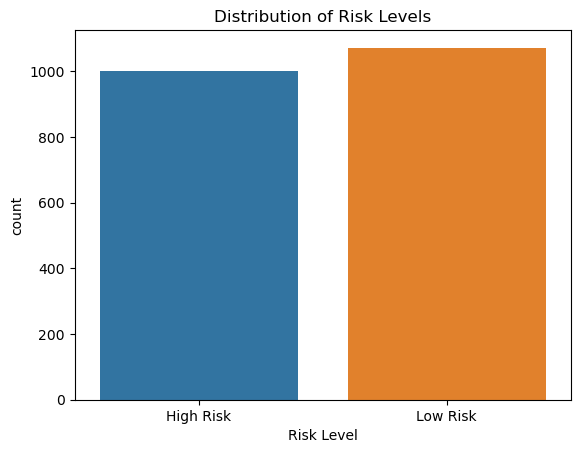

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='Risk Level', data=X_test)
plt.title('Distribution of Risk Levels')
plt.show()

In [ ]:
df_new = pd.read_csv(r"C:\Users\sidsr\output_file.csv")

In [ ]:
df_new.head()

,Amount Received,Receiving Currency,Amount Paid,Payment Currency,Payment Format,Is Laundering,Place Changed,Account Changed
0,3697.34,0,3697.34,0,2,0,0,0
1,0.01,0,0.01,0,0,0,1,1
2,14675.57,0,14675.57,0,2,0,0,0
3,2806.97,0,2806.97,0,2,0,0,0
4,36682.97,0,36682.97,0,2,0,0,0


In [ ]:
df_new.columns

Index(['Amount Received', 'Receiving Currency', 'Amount Paid',
       'Payment Currency', 'Payment Format', 'Is Laundering', 'Place Changed',
       'Account Changed'],
      dtype='object')

In [ ]:
X_new = df_new[['Amount Received','Receiving Currency','Amount Paid','Payment Currency','Payment Format','Place Changed','Account Changed']]
Y_new = df_new['Is Laundering']

In [ ]:
from imblearn.under_sampling import RandomUnderSampler
undersampler = RandomUnderSampler()
X_new,Y_new=undersampler.fit_resample(X_new,Y_new)

C:\Users\sidsr\anaconda3\Lib\site-packages\sklearn\base.py:484: FutureWarning: `BaseEstimator._check_n_features` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_n_features` instead.
  warnings.warn(
C:\Users\sidsr\anaconda3\Lib\site-packages\sklearn\base.py:493: FutureWarning: `BaseEstimator._check_feature_names` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_feature_names` instead.
  warnings.warn(


In [ ]:
predicted_signals = model.predict(X_new)

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

accuracy = accuracy_score(Y_new, predicted_signals)

print("Model accuracy on new data:", accuracy)

Model accuracy on new data: 0.9308555399719495


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(Y_new, predicted_signals))

              precision    recall  f1-score   support

           0       0.92      0.95      0.93      3565
           1       0.94      0.92      0.93      3565

    accuracy                           0.93      7130
   macro avg       0.93      0.93      0.93      7130
weighted avg       0.93      0.93      0.93      7130



In [ ]:
import pickle

In [ ]:
pickle.dump(model,open('bankmodel.pkl', 'wb'))